In [3]:
import pandas as pd

def ler_arquivo_dat(nome_arquivo):
    with open(nome_arquivo, "r") as arquivo:
        conteudo = arquivo.readlines()  # Lê todas as linhas do arquivo
        
        # Encontra a primeira linha contendo START_VARIABLE = nome_variavel
        var = ""
        for linha in conteudo:
            if "START_VARIABLE" in linha:
                var = linha.split("=")[1].strip()
                break  # Sai do loop quando encontrar a linha desejada
        
        # Procura por linhas começando com SIZES = e adiciona as variáveis ao array
        variaveis = []
        for linha in conteudo:
            if "SIZES" in linha:
                quantidade = int(linha.split("=")[1])
                for i in range(1, quantidade + 1):
                    variaveis.append(f"{var}{i}")
            elif "START_VARIABLE" in linha:
                var = linha.split("=")[1].strip()
            if "EOF" in linha:
                break  # Sai do loop quando encontrar EOF
        
        # Cria um dataframe pandas a partir das linhas restantes do arquivo
        dados = [linha.strip().split(",") for linha in conteudo if len(linha.strip().split(",")) == 11]
        df = pd.DataFrame(dados, columns=variaveis)
        return df

# Chamada da função para ler o arquivo .dat e criar o dataframe
#df = ler_arquivo_dat("utils/C1_CP_FGM_FULL/data.dat")


In [15]:
for col in ['sc_pos_xyz_gse__C1_CP_FGM_FULL1', 'sc_pos_xyz_gse__C1_CP_FGM_FULL2', 'sc_pos_xyz_gse__C1_CP_FGM_FULL3','B_vec_xyz_gse__C1_CP_FGM_FULL1', 'B_vec_xyz_gse__C1_CP_FGM_FULL2', 'B_vec_xyz_gse__C1_CP_FGM_FULL3']:
    df[col] = df[col].astype(float)

In [4]:
import numpy as np
import pandas as pd

def curlometer(delta_r, delta_b):
    # Calcula o rotacional do campo magnético
    rot_b = np.cross(delta_r, delta_b) / np.linalg.norm(delta_r)**2
    
    return rot_b

def estimate_current_density(delta_r, delta_b):
    # Calcula a densidade da corrente média usando a lei de Ampère
    mu_0 = 4 * np.pi * 1e-7
    j = np.zeros(3)
    
    for i in range(3):
        for j in range(3):
            if i != j:
                j += mu_0 * np.dot(j, np.cross(delta_r[i], delta_r[j])) / (np.linalg.norm(delta_r[i])**2)
    
    return j

# Carregar os datasets
data_1 = ler_arquivo_dat("utils/C1_CP_FGM_FULL/data.dat")
data_2 = ler_arquivo_dat("utils/C2_CP_FGM_FULL/C2_CP_FGM_FULL__20010213_104200_20010213_105000_V140306.cef")
data_3 = ler_arquivo_dat("utils/C3_CP_FGM_FULL/C3_CP_FGM_FULL__20010213_104200_20010213_105000_V140305.cef")
data_4 = ler_arquivo_dat("utils/C4_CP_FGM_FULL/C4_CP_FGM_FULL__20010213_104200_20010213_105000_V140305.cef")

# Extrair valores relevantes dos datasets


In [5]:
data_2.columns = data_1.columns
data_3.columns = data_1.columns
data_4.columns = data_1.columns


In [6]:
for col in data_1.columns:
    try:
        data_1[col] = data_1[col].astype(float)
        data_2[col] = data_2[col].astype(float)
        data_3[col] = data_3[col].astype(float)
        data_4[col] = data_4[col].astype(float)
    except:
        pass

In [11]:
data_1 = data_1[:len(data_2)]
data_1

,time_tags__C1_CP_FGM_FULL1,half_interval__C1_CP_FGM_FULL1,B_vec_xyz_gse__C1_CP_FGM_FULL1,B_vec_xyz_gse__C1_CP_FGM_FULL2,B_vec_xyz_gse__C1_CP_FGM_FULL3,B_mag__C1_CP_FGM_FULL1,sc_pos_xyz_gse__C1_CP_FGM_FULL1,sc_pos_xyz_gse__C1_CP_FGM_FULL2,sc_pos_xyz_gse__C1_CP_FGM_FULL3,range__C1_CP_FGM_FULL1,tm__C1_CP_FGM_FULL1
0,2001-02-13T10:42:00.015Z,0.02231,5.113,-7.599,-1.399,9.265,99738.7,14388.7,-29831.2,2.0,22 $
1,2001-02-13T10:42:00.060Z,0.02231,5.090,-7.587,-1.362,9.237,99738.6,14388.7,-29831.3,2.0,22 $
2,2001-02-13T10:42:00.104Z,0.02231,5.107,-7.577,-1.387,9.242,99738.6,14388.7,-29831.3,2.0,22 $
3,2001-02-13T10:42:00.149Z,0.02231,5.094,-7.576,-1.385,9.234,99738.5,14388.6,-29831.4,2.0,22 $
4,2001-02-13T10:42:00.193Z,0.02231,5.060,-7.551,-1.382,9.195,99738.5,14388.6,-29831.4,2.0,22 $
...,...,...,...,...,...,...,...,...,...,...,...
10757,2001-02-13T10:49:59.777Z,0.02231,-2.179,7.030,-1.407,7.493,99217.6,14068.4,-30233.0,2.0,22 $
10758,2001-02-13T10:49:59.822Z,0.02231,-2.200,7.041,-1.339,7.497,99217.6,14068.4,-30233.0,2.0,22 $
10759,2001-02-13T10:49:59.867Z,0.02231,-2.185,7.024,-1.282,7.467,99217.5,14068.4,-30233.1,2.0,22 $
10760,2001-02-13T10:49:59.911Z,0.02231,-2.139,7.011,-1.301,7.444,99217.5,14068.3,-30233.1,2.0,22 $


In [115]:
data

,time_tags__C1_CP_FGM_FULL1,half_interval__C1_CP_FGM_FULL1,B_vec_xyz_gse__C1_CP_FGM_FULL1,B_vec_xyz_gse__C1_CP_FGM_FULL2,B_vec_xyz_gse__C1_CP_FGM_FULL3,B_mag__C1_CP_FGM_FULL1,sc_pos_xyz_gse__C1_CP_FGM_FULL1,sc_pos_xyz_gse__C1_CP_FGM_FULL2,sc_pos_xyz_gse__C1_CP_FGM_FULL3,range__C1_CP_FGM_FULL1,tm__C1_CP_FGM_FULL1
0,2001-02-13T10:42:00.028Z,0.02231,5.057,-7.689,-1.030,9.260,99807.4,14431.3,-30630.0,2.0,22 $
1,2001-02-13T10:42:00.072Z,0.02231,5.078,-7.718,-1.043,9.297,99807.4,14431.3,-30630.0,2.0,22 $
2,2001-02-13T10:42:00.117Z,0.02231,5.081,-7.653,-1.089,9.250,99807.3,14431.2,-30630.0,2.0,22 $
3,2001-02-13T10:42:00.162Z,0.02231,5.110,-7.707,-1.119,9.314,99807.3,14431.2,-30630.1,2.0,22 $
4,2001-02-13T10:42:00.206Z,0.02231,5.062,-7.677,-1.119,9.264,99807.2,14431.2,-30630.1,2.0,22 $
...,...,...,...,...,...,...,...,...,...,...,...
10757,2001-02-13T10:49:59.785Z,0.02231,-0.907,7.245,-1.656,7.487,99287.7,14110.9,-31027.1,2.0,22 $
10758,2001-02-13T10:49:59.830Z,0.02231,-0.890,7.286,-1.697,7.534,99287.7,14110.8,-31027.1,2.0,22 $
10759,2001-02-13T10:49:59.874Z,0.02231,-0.871,7.207,-1.663,7.447,99287.6,14110.8,-31027.2,2.0,22 $
10760,2001-02-13T10:49:59.919Z,0.02231,-0.845,7.195,-1.687,7.439,99287.6,14110.8,-31027.2,2.0,22 $


In [14]:
import pandas as pd
import numpy as np

def curlometer(df1, df2, df3, df4):
    if len(df1) != len(df2) or len(df1) != len(df3) or len(df1) != len(df4):
        raise ValueError("The DataFrames must have the same length")
    # Extract the required columns from the DataFrames
    B13 = df1['B_vec_xyz_gse__C1_CP_FGM_FULL1'] - df3['B_vec_xyz_gse__C1_CP_FGM_FULL1']
    B23 = df2['B_vec_xyz_gse__C1_CP_FGM_FULL1'] - df3['B_vec_xyz_gse__C1_CP_FGM_FULL1']
    B14 = df1['B_vec_xyz_gse__C1_CP_FGM_FULL1'] - df4['B_vec_xyz_gse__C1_CP_FGM_FULL1']
    B24 = df2['B_vec_xyz_gse__C1_CP_FGM_FULL1'] - df4['B_vec_xyz_gse__C1_CP_FGM_FULL1']
    B34 = df3['B_vec_xyz_gse__C1_CP_FGM_FULL1'] - df4['B_vec_xyz_gse__C1_CP_FGM_FULL1']
    

    r13 = np.vstack([
        df3['sc_pos_xyz_gse__C1_CP_FGM_FULL1'] - df1['sc_pos_xyz_gse__C1_CP_FGM_FULL1'],
        df3['sc_pos_xyz_gse__C1_CP_FGM_FULL2'] - df1['sc_pos_xyz_gse__C1_CP_FGM_FULL2'],
        df3['sc_pos_xyz_gse__C1_CP_FGM_FULL3'] - df1['sc_pos_xyz_gse__C1_CP_FGM_FULL3']
    ]).T
    r23 = np.vstack([
        df3['sc_pos_xyz_gse__C1_CP_FGM_FULL1'] - df2['sc_pos_xyz_gse__C1_CP_FGM_FULL1'],
        df3['sc_pos_xyz_gse__C1_CP_FGM_FULL2'] - df2['sc_pos_xyz_gse__C1_CP_FGM_FULL2'],
        df3['sc_pos_xyz_gse__C1_CP_FGM_FULL3'] - df2['sc_pos_xyz_gse__C1_CP_FGM_FULL3']
    ]).T
    r14 = np.vstack([
        df4['sc_pos_xyz_gse__C1_CP_FGM_FULL1'] - df1['sc_pos_xyz_gse__C1_CP_FGM_FULL1'],
        df4['sc_pos_xyz_gse__C1_CP_FGM_FULL2'] - df1['sc_pos_xyz_gse__C1_CP_FGM_FULL2'],
        df4['sc_pos_xyz_gse__C1_CP_FGM_FULL3'] - df1['sc_pos_xyz_gse__C1_CP_FGM_FULL3']
    ]).T
    r24 = np.vstack([
        df4['sc_pos_xyz_gse__C1_CP_FGM_FULL1'] - df2['sc_pos_xyz_gse__C1_CP_FGM_FULL1'],
        df4['sc_pos_xyz_gse__C1_CP_FGM_FULL2'] - df2['sc_pos_xyz_gse__C1_CP_FGM_FULL2'],
        df4['sc_pos_xyz_gse__C1_CP_FGM_FULL3']
    ]).T
    r34 = np.vstack([
        df4['sc_pos_xyz_gse__C1_CP_FGM_FULL1'] - df3['sc_pos_xyz_gse__C1_CP_FGM_FULL1'],
        df4['sc_pos_xyz_gse__C1_CP_FGM_FULL2'] - df3['sc_pos_xyz_gse__C1_CP_FGM_FULL2'],
        df4['sc_pos_xyz_gse__C1_CP_FGM_FULL3'] - df3['sc_pos_xyz_gse__C1_CP_FGM_FULL3']
    ]).T
    # Calculate the cross products
    r13_cross_r23 = np.cross(r13, r23)
    r13_cross_r14 = np.cross(r13, r14)
    r23_cross_r24 = np.cross(r23, r24)
    r13_cross_r34 = np.cross(r13, r34)
    # Calculate the average current density components using relation (2)
    Jx = np.dot(df1['B_vec_xyz_gse__C1_CP_FGM_FULL1'] - df3['B_vec_xyz_gse__C1_CP_FGM_FULL1'], r23_cross_r24) / np.linalg.norm(r13_cross_r23)**2
    Jy = np.dot(df1['B_vec_xyz_gse__C1_CP_FGM_FULL1'] - df4['B_vec_xyz_gse__C1_CP_FGM_FULL1'], r13_cross_r34) / np.linalg.norm(r13_cross_r14)**2
    Jz = np.dot(df2['B_vec_xyz_gse__C1_CP_FGM_FULL1'] - df4['B_vec_xyz_gse__C1_CP_FGM_FULL1'], r23_cross_r24) / np.linalg.norm(r23_cross_r24)**2

    # Combine the components into the average current density vector Jav
    Jav = pd.DataFrame({'Jx': Jx, 'Jy': Jy, 'Jz': Jz})
    Jav["curl"] = (Jav["Jx"] + Jav["Jy"] + Jav["Jz"])/3
    return Jav



curlometer(data_1, data_2, data_3, data_4)

array([[174187.54      ,  44518.8       , 314596.58      ],
       [174086.22      ,  44504.59      , 314596.58      ],
       [174187.54      ,  44518.8       , 314596.58      ],
       ...,
       [169730.61      ,  43158.69      , 314987.64      ],
       [169777.92      ,  43144.96      , 314961.92      ],
       [169831.35      ,  43172.67      , 314987.64000001]])

In [16]:
time_tags = data_1["time_tags__C1_CP_FGM_FULL1"]
B_xyz_1 =   data_1[["B_vec_xyz_gse__C1_CP_FGM_FULL1", "B_vec_xyz_gse__C1_CP_FGM_FULL2", "B_vec_xyz_gse__C1_CP_FGM_FULL3"]]
B_xyz_2 =   data_2[["B_vec_xyz_gse__C1_CP_FGM_FULL1", "B_vec_xyz_gse__C1_CP_FGM_FULL2", "B_vec_xyz_gse__C1_CP_FGM_FULL3"]]
B_xyz_3 =   data_3[["B_vec_xyz_gse__C1_CP_FGM_FULL1", "B_vec_xyz_gse__C1_CP_FGM_FULL2", "B_vec_xyz_gse__C1_CP_FGM_FULL3"]]
B_xyz_4 =   data_4[["B_vec_xyz_gse__C1_CP_FGM_FULL1", "B_vec_xyz_gse__C1_CP_FGM_FULL2", "B_vec_xyz_gse__C1_CP_FGM_FULL3"]]


In [17]:
def calculate_current_density(B1, B2, r1, r2):
    J = np.cross((B1 - B2), (r1 - r2))/(mu_0)
    return J

r13 = data_1[["sc_pos_xyz_gse__C1_CP_FGM_FULL1", "sc_pos_xyz_gse__C1_CP_FGM_FULL3"]].diff(axis=1).values
r23 = data_2[["sc_pos_xyz_gse__C1_CP_FGM_FULL2", "sc_pos_xyz_gse__C1_CP_FGM_FULL3"]].diff(axis=1).values
r12 = data_1[["sc_pos_xyz_gse__C1_CP_FGM_FULL1", "sc_pos_xyz_gse__C1_CP_FGM_FULL2"]].diff(axis=1).values

B13 = B_xyz_1 - B_xyz_3
B23 = B_xyz_2 - B_xyz_3
B12 = B_xyz_1 - B_xyz_2

mu_0 = 4 * np.pi * 10**-7  # vacuum permeability constant

J123 = calculate_current_density(B13, B23, r13, r23)
J124 = calculate_current_density(B12, B23, r12, r23)
J134 = calculate_current_density(B13, B12, r13, r12)


NameError: name 'df2' is not defined

In [18]:
J234 = calculate_current_density(B_xyz_2 - B_xyz_4, B_xyz_3 - B_xyz_4, data_2[["sc_pos_xyz_gse__C1_CP_FGM_FULL2", "sc_pos_xyz_gse__C1_CP_FGM_FULL3"]].diff(axis=1).values, data_3[["sc_pos_xyz_gse__C1_CP_FGM_FULL2", "sc_pos_xyz_gse__C1_CP_FGM_FULL3"]].diff(axis=1).values)


In [19]:
Jav_x = J123[:, 0] + J124[:, 0] + J134[:, 0]
Jav_y = J123[:, 1] + J124[:, 1] + J134[:, 1]
Jav_z = J123[:, 2] + J124[:, 2] + J134[:, 2]

Jav = pd.DataFrame({"Jav_x": Jav_x, "Jav_y": Jav_y, "Jav_z": Jav_z})


<Axes: >

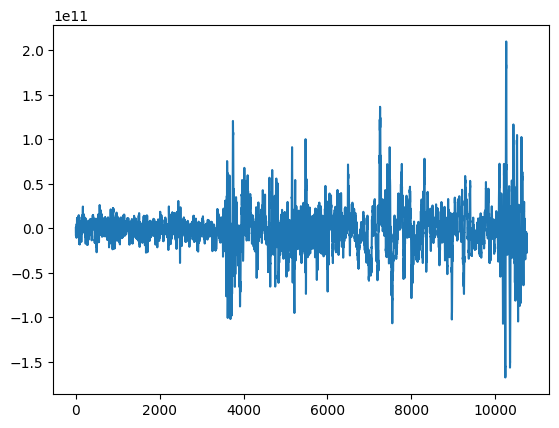

In [21]:
Jav["Jav_x"].plot()

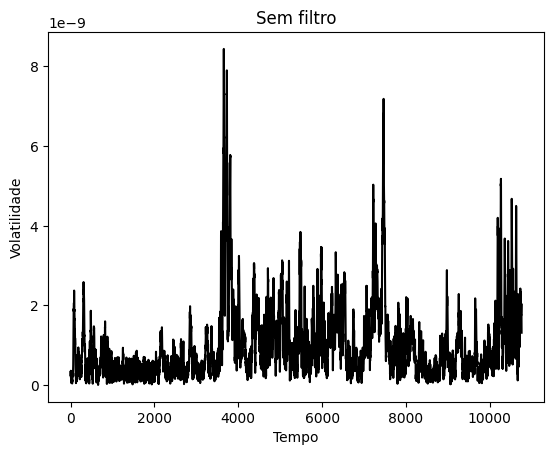

In [22]:
import numpy as np
import matplotlib.pyplot as plt
def convert_to_float(s):
    try:
        return float(s)
    except ValueError:
        # Handle specific formatting issues if necessary
        return float(s.replace('D', 'E'))
current_density = np.loadtxt('utils/current_sheet/current_density.dat', converters={0: convert_to_float})
#x_coords = x_coords * 10e9  
#x_coords = x_coords * 10e9  
# Display the plot
plt.plot(current_density, color="black")
plt.xlabel('Tempo')
plt.ylabel('Volatilidade')

# Set the title of the plot
plt.title('Sem filtro')


plt.show()

In [63]:
data_4[['sc_pos_xyz_gse__C1_CP_FGM_FULL1', 'sc_pos_xyz_gse__C1_CP_FGM_FULL3']].values

array([[ 99807.4, -30630. ],
       [ 99807.4, -30630. ],
       [ 99807.3, -30630. ],
       ...,
       [ 99287.6, -31027.2],
       [ 99287.6, -31027.2],
       [ 99287.5, -31027.2]])

In [28]:
[data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values]

[array(['99738.7', '99738.6', '99738.6', ..., '99217.5', '99217.4',
        '99217.4'], dtype=object),
 array(['13721.3', '13721.3', '13721.3', ..., '13406.7', '13406.6',
        '13406.6'], dtype=object),
 array(['-30025.2', '-30025.2', '-30025.3', ..., '-30423.1', '-30423.1',
        '-30423.2'], dtype=object)]

In [40]:
delta_r_values = np.array([
    [data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["sc_pos_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["sc_pos_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["sc_pos_xyz_gse__C3_CP_FGM_FULL3"].values]
])

delta_b_values = np.array([
    [data_1["B_vec_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["B_vec_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["B_vec_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["B_vec_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["B_vec_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["B_vec_xyz_gse__C3_CP_FGM_FULL3"].values],
    [data_1["B_vec_xyz_gse__C1_CP_FGM_FULL1"].values, data_2["B_vec_xyz_gse__C2_CP_FGM_FULL2"].values, data_3["B_vec_xyz_gse__C3_CP_FGM_FULL3"].values]
])


In [49]:
delta_r = delta_r_values[:, :, i].astype(float)
delta_b = delta_b_values[:, :, i].astype(float)

densidade = []
# Processar os valores para cada ponto no tempo
for i in range(len(data_1)):
    
    rot_b = curlometer(delta_r, delta_b)
    current_density = estimate_current_density(delta_r, delta_b)
    
    print(f"Tempo: {data_1['time_tags__C1_CP_FGM_FULL1'].iloc[i]}")
    print("Rotacional do campo magnético:")
    print(rot_b)
    print("Densidade média da corrente:")
    print(current_density)
    densidade.append(current_density)
    print("---")


AxisError: axisa: axis -1 is out of bounds for array of dimension 0

In [1]:
import numpy as np

def curlometer(delta_r, delta_b):
    # Calcula o rotacional do campo magnético
    rot_b = np.cross(delta_r, delta_b) / np.linalg.norm(delta_r)**2
    
    return rot_b

def estimate_current_density(delta_r, delta_b):
    # Calcula a densidade da corrente média usando a lei de Ampère
    mu_0 = 4 * np.pi * 1e-7
    j = np.zeros(3)
    
    for i in range(3):
        for j in range(3):
            if i != j:
                j += mu_0 * np.dot(j, np.cross(delta_r[i], delta_r[j])) / (np.linalg.norm(delta_r[i])**2)
    
    return j

# Exemplo de uso
delta_r = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
delta_b = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 2]])

rot_b = curlometer(delta_r, delta_b)
current_density = estimate_current_density(delta_r, delta_b)

print("Rotacional do campo magnético:")
print(rot_b)

print("Densidade média da corrente:")
print(current_density)


Rotacional do campo magnético:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Densidade média da corrente:
2
